<font size="6"> มาเล่นที่ลิ้งค์นี้
http://tinyurl.com/ms9swcsx</font>

In [1]:
!pip install pythainlp

In [2]:
!pip install pythainlp[attacut,thai_nner,wangchanberta]

# Text Cleaning

**การทำความสะอาดข้อความ** คือ

กระบวนการจัดการข้อความดิบ (raw text) หรือข้อความต้นฉบับ ให้อยู่ในรูปแบบที่เหมาะสมก่อนนำไปประมวลผล เช่น การลบลิ้งค์, การลบอักขระพิเศษ หรือการจัดลำดับอักขระให้ถูกต้องตามไวยากรณ์ เป็นต้น

ตัวอย่างข้อความต้นฉบับ

```
"""
📣 ขาย พร้อมส่ง หน้ากากอนามัยกันฝุ่น PM 2.5 🙊 ในราคา ฿230, 250 ใน #Shopma ตอนนี้! https://shopma.com/banana/123456
"""
```

ตัวอย่างข้อความที่ทำความสะอาดแล้ว
```
"""
ขาย พร้อมส่ง หน้ากากอนามัยกันฝุ่น PM 2.5  ในราคา 230 250 ใน #Shopma ตอนนี้
"""
```

## URL Removing

การลบลิ้งค์ คือ การนำลิ้งค์ที่อยู่ในข้อความออก โดยใช้รูปแบบ (Pattern) ของ url มาใช้ เช่น คำนำหน้าที่เป็น http

In [3]:
import re

In [4]:
text = "📣 ขาย พร้อมส่ง หน้ากากอนามัยกันฝุ่น PM 2.5 🙊 ในราคา ฿230, 250 ใน #Shopma ตอนนี้! https://shopma.com/banana/123456"
text

'📣 ขาย พร้อมส่ง หน้ากากอนามัยกันฝุ่น PM 2.5 🙊 ในราคา ฿230, 250 ใน #Shopma ตอนนี้! https://shopma.com/banana/123456'

**Regular Expression**

สัญลักษณ์ | ความหมาย
--- | ---
`.` | ทุกตัวอักษรยกเว้นการขึ้นบรรทัดใหม่
`\w` | ทุกตัวอักษรและ underscore
`\W` | ที่ไม่ใช่ตัวอักษร
`\d` | ตัวเลขทุกตัว
`\D` | ที่ไม่ใช่ตัวเลข
`\s` | whitespace(tab, space, line break)
`\S` | ที่ไม่ใช่ whitespace
`a*` | ไม่มี a หรือมีก็ได้
`a+` | a อย่างน้อย 1 ตัว
`[a-f]` | อะไรก็ได้ระหว่าง a ถึง f
`[^abc]` | อะไรก็ได้ที่ไม่ใช่ a,b หรือ c

สามารถศึกษาเพิ่มเติมได้ที่ :
- https://devahoy.com/blog/2016/11/regular-expressions-101
- https://regexone.com/

```
re.sub(pattern, replace, string)
```

parameters :
- pattern สำหรับใส่รูปแบบที่ต้องการใช้ค้นหาด้วย regular expression
- replace สำหรับใส่ข้อความที่ต้องการแทนที่
- string สำหรับใส่ข้อความต้องที่การค้นหาเพื่อแทนที่

return :
- ข้อความที่ถูกแทนที่ตาม pattern ที่ใส่เข้ามา

In [5]:
text_no_url = re.sub(r'http\S+', '', text)
text_no_url

'📣 ขาย พร้อมส่ง หน้ากากอนามัยกันฝุ่น PM 2.5 🙊 ในราคา ฿230, 250 ใน #Shopma ตอนนี้! '

**Let's Play**

In [6]:
tmp1 = "📣 https://shopma.com/banana/123456 ขาย พร้อมส่ง หน้ากากอนามัยกันฝุ่น PM 2.5 🙊 https://shopma.com/banana/123456ในราคา ฿230, 250 ใน #Shopma ตอนนี้! https://shopma.com/banana/123456"
print(tmp1)
result = re.sub(r'http\S+', '', tmp1)
print(result)

📣 https://shopma.com/banana/123456 ขาย พร้อมส่ง หน้ากากอนามัยกันฝุ่น PM 2.5 🙊 https://shopma.com/banana/123456ในราคา ฿230, 250 ใน #Shopma ตอนนี้! https://shopma.com/banana/123456
📣  ขาย พร้อมส่ง หน้ากากอนามัยกันฝุ่น PM 2.5 🙊  ฿230, 250 ใน #Shopma ตอนนี้! 


## Special Character Removing

**การลบอักขระพิเศษ** คือ การลบเครื่องหมายที่ไม่ต้องการออกจากข้อความ
ซึ่งสามารถใช้ได้ 2 วิธี
1. ลบอักขระที่ไม่ต้องการออก
2. เลือกเฉพาะอักขระที่ต้องการ


![](http://thaifont.info/wp-content/uploads/2011/02/thai-unicode-glyph500.jpg)

ref: http://thaifont.info/wp-content/uploads/2011/02/thai-unicode-glyph500.jpg

In [7]:
text_no_url

'📣 ขาย พร้อมส่ง หน้ากากอนามัยกันฝุ่น PM 2.5 🙊 ในราคา ฿230, 250 ใน #Shopma ตอนนี้! '

```
re.findall(pattern, string)
```

parameters :
- pattern สำหรับใส่รูปแบบที่ต้องการใช้ค้นหาด้วย regular expression
- string สำหรับใส่ข้อความต้องที่การค้นหา

return :
- ลิสต์ของอักขระที่อยู่ใน pattern

In [8]:
selected_char_list = re.findall(r"[\u0E01-\u0E5Ba-zA-Z0-9.#฿ ]", text_no_url) #uniform thai = \u0E01-\u0E5B then select aphabet
print(selected_char_list)

[' ', 'ข', 'า', 'ย', ' ', 'พ', 'ร', '้', 'อ', 'ม', 'ส', '่', 'ง', ' ', 'ห', 'น', '้', 'า', 'ก', 'า', 'ก', 'อ', 'น', 'า', 'ม', 'ั', 'ย', 'ก', 'ั', 'น', 'ฝ', 'ุ', '่', 'น', ' ', 'P', 'M', ' ', '2', '.', '5', ' ', ' ', 'ใ', 'น', 'ร', 'า', 'ค', 'า', ' ', '฿', '2', '3', '0', ' ', '2', '5', '0', ' ', 'ใ', 'น', ' ', '#', 'S', 'h', 'o', 'p', 'm', 'a', ' ', 'ต', 'อ', 'น', 'น', 'ี', '้', ' ']


In [9]:
text_no_spc = "".join(selected_char_list)
text_no_spc

' ขาย พร้อมส่ง หน้ากากอนามัยกันฝุ่น PM 2.5  ในราคา ฿230 250 ใน #Shopma ตอนนี้ '

หรือ

In [10]:
import string

In [11]:
text_no_spc1 = """ ขาย พร้อมส่ง หน้ากากอนามัยกันฝุ่น
PM 2.5  ในราคา ฿230 250 ใน
#Shopma ตอนนี้ """
text_no_spc1

' ขาย พร้อมส่ง หน้ากากอนามัยกันฝุ่น\nPM 2.5  ในราคา ฿230 250 ใน\n#Shopma ตอนนี้ '

อักขระพิเศษในข้อความ | ความหมาย
--- | ---
`\n` | new line on Linux
`\r\n` | new line on Windows
`\t` | tap

```
trans = str.maketrans(current, mapping, unwanted_word)
string.translate(trans)
```

Parameters :
- current เป็น string ของอักขระที่ต้องการให้เปลี่ยน
- mapping เป็น string ของอักขระที่ต้องการให้เป็น
- unwanted_word เป็น string ของอักขระที่ไม่ต้องการให้อยู่ในข้อความ
- trans เป็น ตัวแปรที่เก็บรูปแบบที่ต้องการให้แปล

Return :
- ข้อความที่ได้การแปลตามรูปแบบที่ต้องการ

In [12]:
trans = str.maketrans("","","฿\n")
text_no_spc2 = text_no_spc1.translate(trans)
text_no_spc2

' ขาย พร้อมส่ง หน้ากากอนามัยกันฝุ่นPM 2.5  ในราคา 230 250 ใน#Shopma ตอนนี้ '

**Let's Play**

In [13]:
tmp1 = "📣 ขาย พร้อมส่ง หน้ากากอนามัยกันฝุ่น PM 2.5 🙊 ในราคา ฿230, 250 ใน #Shopma ตอนนี้! "
result = "".join(re.findall(r"[\u0E01-\u0E3E\u0E40-\u0E5B0-9. ]", tmp1))
result

' ขาย พร้อมส่ง หน้ากากอนามัยกันฝุ่น  2.5  ในราคา 230 250 ใน  ตอนนี้ '

In [14]:
tmp1 = """📣 ขาย พร้อมส่ง\tหน้ากากอนามัยกันฝุ่น
PM 2.5 🙊 ในราคา ฿230, 250 ใน #Shopma ตอนนี้! """
print(tmp1)
trans1 = str.maketrans("","","!฿\n🙊📣")
result = tmp1.translate(trans1)
print()
print(result)

📣 ขาย พร้อมส่ง	หน้ากากอนามัยกันฝุ่น
PM 2.5 🙊 ในราคา ฿230, 250 ใน #Shopma ตอนนี้! 

 ขาย พร้อมส่ง	หน้ากากอนามัยกันฝุ่นPM 2.5  ในราคา 230, 250 ใน #Shopma ตอนนี้ 


## Duplicated Space Removal

**การกำจัดช่องว่างซ้ำ** คือ
การทำให้ข้อความที่มี `white space` ตั้งแต่ 2 อัน ขึ้นไปมาเป็น 1 อัน

In [15]:
text_no_spc2

' ขาย พร้อมส่ง หน้ากากอนามัยกันฝุ่นPM 2.5  ในราคา 230 250 ใน#Shopma ตอนนี้ '

In [16]:
no_dup_space_text = re.sub(r' +', ' ', text_no_spc2)
no_dup_space_text

' ขาย พร้อมส่ง หน้ากากอนามัยกันฝุ่นPM 2.5 ในราคา 230 250 ใน#Shopma ตอนนี้ '

**แถม**

In [17]:
clean_text = no_dup_space_text.strip() #front and backend trim sentense
clean_text

'ขาย พร้อมส่ง หน้ากากอนามัยกันฝุ่นPM 2.5 ในราคา 230 250 ใน#Shopma ตอนนี้'

# Sentence Segmentation

**การตัดประโยค** คือ การแบ่งประโยคจากข้อความ โดยจะมีรูปแบบการจัดประโยคหลายรูปแบบ เช่น
- ใช้ Machine Learning
- ใช้ Whitespace
- ใช้สัญลักษณ์ New line

ศึกษารูปแบบประโยคในภาษาไทยได้ที่
[link](http://www.digitalschool.club/digitalschool/m1/th1_1/lesson1/content3/more/page8.php#:~:text=2.%20%E0%B8%A3%E0%B8%B9%E0%B8%9B%E0%B8%9B%E0%B8%A3%E0%B8%B0%E0%B9%82%E0%B8%A2%E0%B8%84%E0%B8%AB%E0%B8%A5%E0%B8%B1%E0%B8%81%E0%B8%82%E0%B8%AD%E0%B8%87,%E0%B9%80%E0%B8%8A%E0%B9%88%E0%B8%99%20%E0%B8%A1%E0%B8%B5%E0%B8%82%E0%B9%89%E0%B8%B2%E0%B8%A7%E0%B9%83%E0%B8%99%E0%B8%99%E0%B8%B2)

In [18]:
from pythainlp import sent_tokenize

In [19]:
text = """ประเทศไทยมีชื่ออย่างเป็นทางการว่าราชอาณาจักรไทยเป็นรัฐชาติอันตั้งอยู่ในภูมิภาคเอเชียตะวันออกเฉียงใต้
เดิมมีชื่อว่าสยาม รัฐบาลประกาศเปลี่ยนชื่อเป็นประเทศไทยอย่างเป็นทางการตั้งแต่ปี 2482
ประเทศไทยมีขนาดใหญ่เป็นอันดับที่ 50 ของโลก มีเนื้อที่ 513,120 ตารางกิโลเมตร และมีประชากรมากเป็นอันดับที่ 20 ของโลก คือ ประมาณ 70 ล้านคน"""

```
sent_tokenize(text, engine)
```

Parameters :
- text คือ ข้อความที่ต้องการให้ตัดประโยค
- engine คือ รูปแบบที่จะให้แบ่งประโยค ได้แก่ crfcut(default), whitespace, whitespace+newline

Return :
- ลิสต์ของประโยค

In [20]:
# default crfcut
# Using conditional random field(CRF) on TED dataset
print(sent_tokenize(text))

['ประเทศไทยมีชื่ออย่างเป็นทางการว่าราชอาณาจักรไทยเป็นรัฐชาติอันตั้งอยู่ในภูมิภาคเอเชียตะวันออกเฉียงใต้\nเดิมมีชื่อว่าสยาม รัฐบาลประกาศเปลี่ยนชื่อเป็นประเทศไทยอย่างเป็นทางการตั้งแต่ปี 2482\nประเทศไทยมีขนาดใหญ่เป็นอันดับที่ 50 ของโลก ', 'มีเนื้อที่ 513,120 ตารางกิโลเมตร และมีประชากรมากเป็นอันดับที่ 20 ของโลก ', 'คือ ประมาณ 70 ล้านคน']


In [21]:
print(sent_tokenize(text, engine="whitespace"))

['ประเทศไทยมีชื่ออย่างเป็นทางการว่าราชอาณาจักรไทยเป็นรัฐชาติอันตั้งอยู่ในภูมิภาคเอเชียตะวันออกเฉียงใต้\nเดิมมีชื่อว่าสยาม', 'รัฐบาลประกาศเปลี่ยนชื่อเป็นประเทศไทยอย่างเป็นทางการตั้งแต่ปี', '2482\nประเทศไทยมีขนาดใหญ่เป็นอันดับที่', '50', 'ของโลก', 'มีเนื้อที่', '513,120', 'ตารางกิโลเมตร', 'และมีประชากรมากเป็นอันดับที่', '20', 'ของโลก', 'คือ', 'ประมาณ', '70', 'ล้านคน']


In [22]:
print(sent_tokenize(text, engine="whitespace+newline"))

['ประเทศไทยมีชื่ออย่างเป็นทางการว่าราชอาณาจักรไทยเป็นรัฐชาติอันตั้งอยู่ในภูมิภาคเอเชียตะวันออกเฉียงใต้', 'เดิมมีชื่อว่าสยาม', 'รัฐบาลประกาศเปลี่ยนชื่อเป็นประเทศไทยอย่างเป็นทางการตั้งแต่ปี', '2482', 'ประเทศไทยมีขนาดใหญ่เป็นอันดับที่', '50', 'ของโลก', 'มีเนื้อที่', '513,120', 'ตารางกิโลเมตร', 'และมีประชากรมากเป็นอันดับที่', '20', 'ของโลก', 'คือ', 'ประมาณ', '70', 'ล้านคน']


In [23]:
print(text.split("\n"))

['ประเทศไทยมีชื่ออย่างเป็นทางการว่าราชอาณาจักรไทยเป็นรัฐชาติอันตั้งอยู่ในภูมิภาคเอเชียตะวันออกเฉียงใต้', 'เดิมมีชื่อว่าสยาม รัฐบาลประกาศเปลี่ยนชื่อเป็นประเทศไทยอย่างเป็นทางการตั้งแต่ปี 2482', 'ประเทศไทยมีขนาดใหญ่เป็นอันดับที่ 50 ของโลก มีเนื้อที่ 513,120 ตารางกิโลเมตร และมีประชากรมากเป็นอันดับที่ 20 ของโลก คือ ประมาณ 70 ล้านคน']


**Let's Play**

In [24]:
tmp1 = """การเลือกหัวข้อเรื่องนั้นสามารถเลือกได้ที่อาจารย์กำหนดให้ หรือเป็นเรื่องที่เราสนใจอยากจะค้นคว้า
โดยเรื่องที่เลือกนั้นจะต้องเป็นเรื่องมีความรู้พื้นฐานอยู่พอสมควรเพื่อที่จะได้ต่อยอดการศึกษาได้ ไม่ไกลตัวจนเกิดไป เพราะอาจจะไม่ได้คำตอบที่ต้องการจะค้นคว้า
"""
print(sent_tokenize(tmp1))

['การเลือกหัวข้อเรื่องนั้นสามารถเลือกได้ที่อาจารย์กำหนดให้ หรือเป็นเรื่องที่เราสนใจอยากจะค้นคว้า\nโดยเรื่องที่เลือกนั้นจะต้องเป็นเรื่องมีความรู้พื้นฐานอยู่พอสมควรเพื่อที่จะได้ต่อยอดการศึกษาได้ ', 'ไม่ไกลตัวจนเกิดไป ', 'เพราะอาจจะไม่ได้คำตอบที่ต้องการจะค้นคว้า\n']


# Word Segmentation

**การตัดคำ** คือ การแบ่งคำที่อยู่ในข้อความ โดยการแบ่งคำมีหลายวิธี เช่น 1. การดูพจนานุกรม 2. การดูตามลักษณะไวยากรณ์ภาษาไทย 3. การใช้ Machine Learning เป็นต้น

ซึ่งแต่ละวิธีการแบ่งคำ คำที่ได้ก็แตกต่างกัน โดยภาษาไทยการสร้างคำขึ้นมามีหลายชนิด ศึกษาเพิ่มเติมที่
[link](https://www.trueplookpanya.com/learning/detail/34513#:~:text=%E0%B8%84%E0%B8%B3%E0%B8%A1%E0%B8%B9%E0%B8%A5%20%E0%B9%80%E0%B8%9B%E0%B9%87%E0%B8%99%E0%B8%84%E0%B8%B3%E0%B8%97%E0%B8%B5%E0%B9%88%E0%B8%A1%E0%B8%B5,%E0%B8%AA%E0%B8%B1%E0%B8%9A%E0%B8%9B%E0%B8%B0%E0%B8%A3%E0%B8%94%20%E0%B8%9A%E0%B8%B1%E0%B8%99%E0%B9%84%E0%B8%94%20%E0%B8%A5%E0%B8%B4%E0%B9%80%E0%B8%81%20%E0%B8%99%E0%B8%B4%E0%B9%82%E0%B8%84%E0%B8%95%E0%B8%B4%E0%B8%99%20%E0%B9%80%E0%B8%9B%E0%B9%87%E0%B8%99%E0%B8%95%E0%B9%89%E0%B8%99)

In [25]:
from pythainlp import word_tokenize

In [26]:
text = "ขาย พร้อมส่ง หน้ากากอนามัยกันฝุ่น PM 2.5 ในราคา 230 250 ใน #Shopma ตอนนี้"

```
word_tokenize(text, engine)
```

Parameters :
- text คือ ข้อความที่ต้องการตัดคำ
- engine คือ รูปแบบที่ต้องการในการตัดคำ ได้แก่ newmm(default), longet, attacut, deepcut, icu, tltk เป็นต้น ดูเพิ่มเติมที่ [link](https://pythainlp.github.io/docs/2.0/api/tokenize.html)

Return :
- ลิตส์ของคำ

In [27]:
# default newmm
# Dictionary-based, Maximum Matching + Thai Character Cluster
tokens = word_tokenize(text)
print(tokens)

['ขาย', ' ', 'พร้อม', 'ส่ง', ' ', 'หน้ากาก', 'อนามัย', 'กัน', 'ฝุ่น', ' ', 'PM', ' ', '2.5', ' ', 'ใน', 'ราคา', ' ', '230', ' ', '250', ' ', 'ใน', ' ', '#', 'Shopma', ' ', 'ตอนนี้']


In [28]:
# Dictionary-based longest-matching
print(word_tokenize(text, engine='longest'))

['ขาย', ' ', 'พร้อม', 'ส่ง', ' ', 'หน้ากาก', 'อนามัย', 'กัน', 'ฝุ่น', ' ', 'pm', ' ', '2.5', ' ', 'ใน', 'ราคา', ' ', '230', ' ', '250', ' ', 'ใน', ' #', 'shopma', ' ', 'ตอนนี้']


In [29]:
# Using convolutional neural network(CNN)
print(word_tokenize(text, engine='attacut'))

['ขาย', ' ', 'พร้อม', 'ส่ง', ' ', 'หน้ากาก', 'อนามัย', 'กัน', 'ฝุ่น', ' ', 'PM', ' ', '2.5', ' ', 'ใน', 'ราคา', ' ', '230', ' ', '250', ' ', 'ใน', ' ', '#', 'Shopma', ' ', 'ตอน', 'นี้']


**Let's Play**

In [30]:
tmp1 = """การเลือกหัวข้อเรื่องนั้นสามารถเลือกได้ที่อาจารย์กำหนดให้ หรือเป็นเรื่องที่เราสนใจอยากจะค้นคว้า
โดยเรื่องที่เลือกนั้นจะต้องเป็นเรื่องมีความรู้พื้นฐานอยู่พอสมควรเพื่อที่จะได้ต่อยอดการศึกษาได้ ไม่ไกลตัวจนเกิดไป เพราะอาจจะไม่ได้คำตอบที่ต้องการจะค้นคว้า
"""
print(word_tokenize(tmp1, engine='newmm'))

['การ', 'เลือก', 'หัวข้อเรื่อง', 'นั้น', 'สามารถ', 'เลือก', 'ได้ที่', 'อาจารย์', 'กำหนดให้', ' ', 'หรือ', 'เป็นเรื่อง', 'ที่', 'เรา', 'สนใจ', 'อยาก', 'จะ', 'ค้นคว้า', '\n', 'โดย', 'เรื่อง', 'ที่', 'เลือก', 'นั้น', 'จะ', 'ต้อง', 'เป็นเรื่อง', 'มีความรู้', 'พื้นฐาน', 'อยู่', 'พอสมควร', 'เพื่อที่จะ', 'ได้', 'ต่อยอด', 'การศึกษา', 'ได้', ' ', 'ไม่', 'ไกล', 'ตัว', 'จน', 'เกิด', 'ไป', ' ', 'เพราะ', 'อาจจะ', 'ไม่', 'ได้', 'คำตอบ', 'ที่', 'ต้องการ', 'จะ', 'ค้นคว้า', '\n']


# Part-of-Speech(POS) Tagging

**การกำกับหน้าที่ของคำ** คือ
การระบุชนิดของคำแต่ละคำที่อยู่ในข้อความว่ามีหน้าที่อะไรในข้อความ โดยในภาษาไทยจะจำแนกอยู่ 7 ประเภทหลัก
1. คำนาม
2. คำสรรพนาม
3. คำกริยา
4. คำวิเศษณ์
5. คำบุพบท
6. คำสันธาน
7. คำอุทาน

In [31]:
from pythainlp.tag import pos_tag

In [32]:
print(tokens)

['ขาย', ' ', 'พร้อม', 'ส่ง', ' ', 'หน้ากาก', 'อนามัย', 'กัน', 'ฝุ่น', ' ', 'PM', ' ', '2.5', ' ', 'ใน', 'ราคา', ' ', '230', ' ', '250', ' ', 'ใน', ' ', '#', 'Shopma', ' ', 'ตอนนี้']


```
pos_tag(word_tokens, engine, corpus)
```
Parameters :
- word_tokens คือ ลิสต์ของประโยคที่ถูกตัดคำ
- engine คือ วิธีการที่ใช้ในการกำกับหน้าของคำ ได้แก่ perceptron(default), unigram, wangchanberta, tltk(only for TNC corpus)
- corpus คือ คลังข้อมูลที่เลือกมาใช้สำหรับกำกับหน้าที่คำ ได้แก่ orchid(default), orchid_ud, lst20, lst20_ud, TNC

Return :
- ลิสต์คู่ลำดับของคำและหน้าที่ของคำ

ref: https://pythainlp.github.io/dev-docs/api/tag.html#pythainlp.tag.pos_tag

In [33]:
print(pos_tag(tokens, corpus='orchid'))

[('ขาย', 'VACT'), (' ', 'PUNC'), ('พร้อม', 'JCRG'), ('ส่ง', 'VACT'), (' ', 'PUNC'), ('หน้ากาก', 'NCMN'), ('อนามัย', 'VACT'), ('กัน', 'ADVN'), ('ฝุ่น', 'NCMN'), (' ', 'PUNC'), ('PM', 'NCMN'), (' ', 'PUNC'), ('2.5', 'DCNM'), (' ', 'PUNC'), ('ใน', 'RPRE'), ('ราคา', 'NCMN'), (' ', 'PUNC'), ('230', 'NCNM'), (' ', 'PUNC'), ('250', 'NCNM'), (' ', 'PUNC'), ('ใน', 'RPRE'), (' ', 'PUNC'), ('#', 'NCMN'), ('Shopma', 'NCMN'), (' ', 'PUNC'), ('ตอนนี้', 'NCMN')]


In [34]:
print(pos_tag(tokens, corpus='orchid_ud'))

[('ขาย', 'VERB'), (' ', 'PUNCT'), ('พร้อม', 'CCONJ'), ('ส่ง', 'VERB'), (' ', 'PUNCT'), ('หน้ากาก', 'NOUN'), ('อนามัย', 'VERB'), ('กัน', 'ADV'), ('ฝุ่น', 'NOUN'), (' ', 'PUNCT'), ('PM', 'NOUN'), (' ', 'PUNCT'), ('2.5', 'NUM'), (' ', 'PUNCT'), ('ใน', 'ADP'), ('ราคา', 'NOUN'), (' ', 'PUNCT'), ('230', 'NUM'), (' ', 'PUNCT'), ('250', 'NUM'), (' ', 'PUNCT'), ('ใน', 'ADP'), (' ', 'PUNCT'), ('#', 'NOUN'), ('Shopma', 'NOUN'), (' ', 'PUNCT'), ('ตอนนี้', 'NOUN')]


# Named Entity Recognition

**การรู้จำชื่อเฉพาะ** คือ
การรู้จำข้อความ หรือคำ ว่ามีลักษณะเป็น คน, สัตว์, สถานที่, เวลา, วันที่ เป็นต้น โดยการกำกับข้อความเหล่านั้นว่ามีลักษณะข้อความเป็นนามเฉพาะแบบใด

ศึกษาเพิ่มเติมระหว่างนามปกติ กับนามเฉพาะ ได้ที่ [link](https://grammarlearn.com/%E0%B8%84%E0%B8%B3%E0%B8%99%E0%B8%B2%E0%B8%A1%E0%B8%97%E0%B8%B1%E0%B9%88%E0%B8%A7%E0%B9%84%E0%B8%9B-common-nouns-%E0%B8%84%E0%B8%B3%E0%B8%99%E0%B8%B2%E0%B8%A1%E0%B9%80%E0%B8%89%E0%B8%9E%E0%B8%B2%E0%B8%B0-proper-noun.html)

In [35]:
from pythainlp.tag import NER

In [36]:
text = """ประเทศไทยมีชื่ออย่างเป็นทางการว่าราชอาณาจักรไทยเป็นรัฐชาติอันตั้งอยู่ในภูมิภาคเอเชียตะวันออกเฉียงใต้
เดิมมีชื่อว่าสยาม รัฐบาลประกาศเปลี่ยนชื่อเป็นประเทศไทยอย่างเป็นทางการตั้งแต่ปี 2482
ประเทศไทยมีขนาดใหญ่เป็นอันดับที่ 50 ของโลก มีเนื้อที่ 513,120 ตารางกิโลเมตร และมีประชากรมากเป็นอันดับที่ 20 ของโลก คือ ประมาณ 70 ล้านคน"""

```
ner = NER(engine, corpus)
ner.tag(text)
```

Parameters :
- engine คือ โมเดลสำหรับการทำงาน ได้แก่ thainer(default), wangchanberta, tltk
- corpus คือ คลังข้อมูลที่ใช้กับโมเดลการทำงาน ได้แก่ thainer(default), lst20(only for wangchanberta)
- text คือ ข้อความที่จะให้รู้จำชื่อเฉพาะ

Return :
- ลิสต์คู่ลำดับของคำ และคำกำกับตำแหน่งของนามเฉพาะ

ref: https://pythainlp.github.io/dev-docs/api/tag.html#pythainlp.tag.NER.tag

In [37]:
ner = NER(engine='thainer',corpus='thainer')
print(ner.tag(text))

[('ประเทศ', 'B-LOCATION'), ('ไทย', 'I-LOCATION'), ('มีชื่อ', 'O'), ('อย่าง', 'O'), ('เป็นทางการ', 'O'), ('ว่า', 'O'), ('ราชอาณาจักร', 'B-LOCATION'), ('ไทย', 'I-LOCATION'), ('เป็น', 'O'), ('รัฐ', 'O'), ('ชาติ', 'O'), ('อัน', 'O'), ('ตั้งอยู่', 'O'), ('ใน', 'O'), ('ภูมิภาค', 'O'), ('เอเชียตะวันออกเฉียงใต้', 'B-LOCATION'), ('\n', 'I-LOCATION'), ('เดิม', 'I-LOCATION'), ('มี', 'I-LOCATION'), ('ชื่อว่า', 'I-LOCATION'), ('สยาม', 'I-LOCATION'), (' ', 'O'), ('รัฐบาล', 'O'), ('ประกาศ', 'O'), ('เปลี่ยน', 'O'), ('ชื่อ', 'O'), ('เป็น', 'O'), ('ประเทศ', 'B-LOCATION'), ('ไทย', 'I-LOCATION'), ('อย่าง', 'O'), ('เป็นทางการ', 'O'), ('ตั้งแต่', 'O'), ('ปี', 'O'), (' ', 'O'), ('2482', 'O'), ('\n', 'O'), ('ประเทศ', 'B-LOCATION'), ('ไทย', 'I-LOCATION'), ('มี', 'O'), ('ขนาดใหญ่', 'O'), ('เป็น', 'O'), ('อันดับ', 'O'), ('ที่', 'O'), (' ', 'O'), ('50', 'O'), (' ', 'O'), ('ของ', 'O'), ('โลก', 'O'), (' ', 'O'), ('มี', 'O'), ('เนื้อที่', 'O'), (' ', 'O'), ('513,120', 'O'), (' ', 'O'), ('ตารางกิโลเมตร', 'O'), (' ', 

In [38]:
ner = NER(engine='wangchanberta',corpus='thainer')
print(ner.tag(text))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/282 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/905k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/546 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/419M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:169: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


[('ประเทศไทย', 'B-LOCATION'), ('มีชื่ออย่างเป็นทางการว่า', 'O'), ('ราช', 'B-LOCATION'), ('อาณาจักร', 'I-LOCATION'), ('ไทย', 'I-LOCATION'), ('เป็น', 'O'), ('รัฐ', 'B-LOCATION'), ('ชาติ', 'I-LOCATION'), ('อันตั้งอยู่', 'O'), ('ในภูมิภาค', 'B-LOCATION'), ('เอเชีย', 'I-LOCATION'), ('ตะวันออก', 'I-LOCATION'), ('เฉียงใต้', 'I-LOCATION'), ('เดิมมีชื่อว่า', 'O'), ('สยาม', 'B-LOCATION'), (' รัฐบาลประกาศเปลี่ยนชื่อเป็น', 'O'), ('ประเทศไทย', 'B-LOCATION'), ('อย่างเป็นทางการตั้งแต่ปี ', 'O'), ('', 'B-DATE'), ('248', 'I-DATE'), ('2', 'I-DATE'), ('', 'O'), ('ประเทศไทย', 'B-LOCATION'), ('มีขนาดใหญ่เป็นอันดับที่  50  ของโลก  มีเนื้อที่ ', 'O'), ('', 'B-LEN'), ('5', 'I-LEN'), ('13,120', 'I-LEN'), (' ', 'O'), ('ตารางกิโลเมตร', 'B-LEN'), ('  และมีประชากรมากเป็นอันดับที่  20  ของโลก  คือ  ประมาณ ', 'O'), ('', 'B-MONEY'), ('70 ล้านคน', 'O')]


In [39]:
!pip install --upgrade tensorflow==2.14

# Stopword Removing

**การลบคำไม่สำคัญ*** คือ
การลบคำที่มักใช้ฟุ้มเฟือย ใช้บ่อยครั้งในภาษาไทย โดยมักพบบ่อยในข้อความ เช่น คำเชื่อม คำสันธาน หรือ คำอุทาน เป็นต้น

In [40]:
from pythainlp.corpus import thai_stopwords

In [41]:
print(tokens)

['ขาย', ' ', 'พร้อม', 'ส่ง', ' ', 'หน้ากาก', 'อนามัย', 'กัน', 'ฝุ่น', ' ', 'PM', ' ', '2.5', ' ', 'ใน', 'ราคา', ' ', '230', ' ', '250', ' ', 'ใน', ' ', '#', 'Shopma', ' ', 'ตอนนี้']


In [42]:
stopwords = list(thai_stopwords())
print(stopwords)
print(len(stopwords))

['แล้วแต่', 'ครั้งหลังสุด', 'จนตลอด', 'นับจากนี้', 'ทุกอัน', 'แต่ไหน', 'ครั้งครา', 'ทีเถอะ', 'จึงเป็น', 'แม้กระทั่ง', 'ภายใต้', 'เมื่อคราวที่', 'ครั้งก่อน', 'ไม่ค่อย', 'ซึ่งๆ', 'ครั้งๆ', 'และ', 'ตลอดศก', 'เป็นอาทิ', 'อนึ่ง', 'ดังกล่าว', 'จัดการ', 'นิด', 'เช่นเมื่อ', 'ค่อย', 'ขึ้น', 'ยังงี้', 'เสียยิ่ง', 'อย่างไรเสีย', 'ต่างก็', 'เมื่อครั้ง', 'คง', 'อย่าง', 'เท่า', 'พอที', 'ตลอดเวลา', 'นอกจาก', 'พร้อมกัน', 'เช่นดังที่', 'ช่วย', 'คราวนั้น', 'แห่งใด', 'ซะจนถึง', 'ทั้งหมด', 'จังๆ', 'เยอะแยะ', 'เล็ก', 'ตลอดไป', 'ยิ่งขึ้นไป', 'อื่น', 'ดังเก่า', 'น่า', 'นอกจากที่', 'มั้ยนั่น', 'อาจเป็นด้วย', 'รับ', 'ที่แห่งนั้น', 'แค่', 'ทุกที', 'เหตุผล', 'ใหญ่', 'ก่อน', 'ประการฉะนี้', 'จริง', 'อันละ', 'ที่ไหน', 'อย่างละ', 'ดั่งกับว่า', 'เพื่อให้', 'ยืนยง', 'ครั้งหนึ่ง', 'ค่อนข้างจะ', 'เสร็จกัน', 'เข้าใจ', 'ด้วย', 'ฝ่ายใด', 'พยายาม', 'จนแม้น', 'ส่วนที่', 'เมื่อคืน', 'รวม', 'เผื่อจะ', 'ซึ่งก็', 'จนแม้', 'เต็มๆ', 'จวนเจียน', 'เสียด้วย', 'นอกเหนือ', 'นิดหน่อย', 'กว่า', 'โดย', 'ได้มา', 'เท่ากับ', 'ทุก', 'ทั้ง', '

In [43]:
list_word_not_stopwords = [i for i in tokens if i not in stopwords]
print(list_word_not_stopwords)

['ขาย', ' ', ' ', 'หน้ากาก', 'อนามัย', 'ฝุ่น', ' ', 'PM', ' ', '2.5', ' ', 'ราคา', ' ', '230', ' ', '250', ' ', ' ', '#', 'Shopma', ' ', 'ตอนนี้']


**Let's Play**

In [44]:
tmp1 = """ประเทศไทยมีชื่ออย่างเป็นทางการว่าราชอาณาจักรไทยเป็นรัฐชาติอันตั้งอยู่ในภูมิภาคเอเชียตะวันออกเฉียงใต้
เดิมมีชื่อว่าสยาม รัฐบาลประกาศเปลี่ยนชื่อเป็นประเทศไทยอย่างเป็นทางการตั้งแต่ปี 2482
ประเทศไทยมีขนาดใหญ่เป็นอันดับที่ 50 ของโลก มีเนื้อที่ 513,120 ตารางกิโลเมตร และมีประชากรมากเป็นอันดับที่ 20 ของโลก คือ ประมาณ 70 ล้านคน"""
tk = word_tokenize(tmp1, engine="newmm")
list_word_not_stopwords = [i for i in tk if i not in stopwords]
print(list_word_not_stopwords)

['ประเทศ', 'ไทย', 'มีชื่อ', 'เป็นทางการ', 'ราชอาณาจักร', 'ไทย', 'รัฐ', 'ชาติ', 'ตั้งอยู่', 'ภูมิภาค', 'เอเชียตะวันออกเฉียงใต้', '\n', 'เดิม', 'ชื่อว่า', 'สยาม', ' ', 'รัฐบาล', 'ประกาศ', 'ชื่อ', 'ประเทศ', 'ไทย', 'เป็นทางการ', 'ปี', ' ', '2482', '\n', 'ประเทศ', 'ไทย', 'ขนาดใหญ่', 'อันดับ', ' ', '50', ' ', 'โลก', ' ', 'เนื้อที่', ' ', '513,120', ' ', 'ตารางกิโลเมตร', ' ', 'ประชากร', 'อันดับ', ' ', '20', ' ', 'โลก', ' ', ' ', ' ', '70', ' ', 'ล้าน', 'คน']


In [45]:
list_word_not_stopwords = []
for i in tk:
  if i not in stopwords:
    list_word_not_stopwords.append(i)

# Recap

* Text Cleaning
 * URL Removing
 * Special Character Removing
 * Duplicated Space Removal
* Sentence Segmentation
* Word Segmentation
* Part-of-Speech Tagging
* Named Entity Recognition
* Stopword Removing

# Caution !!!

1. การใช้งาน text preprocessing แต่ละครั้งจงเลือกวิธีการให้เหมาะสมกับงาน
2. ทุกครั้งที่ใช้ควรทดลองหลายๆแบบ
3. ไม่ใช่ทุกครั้งที่ต้องทำ text preprocessing


# Benefit

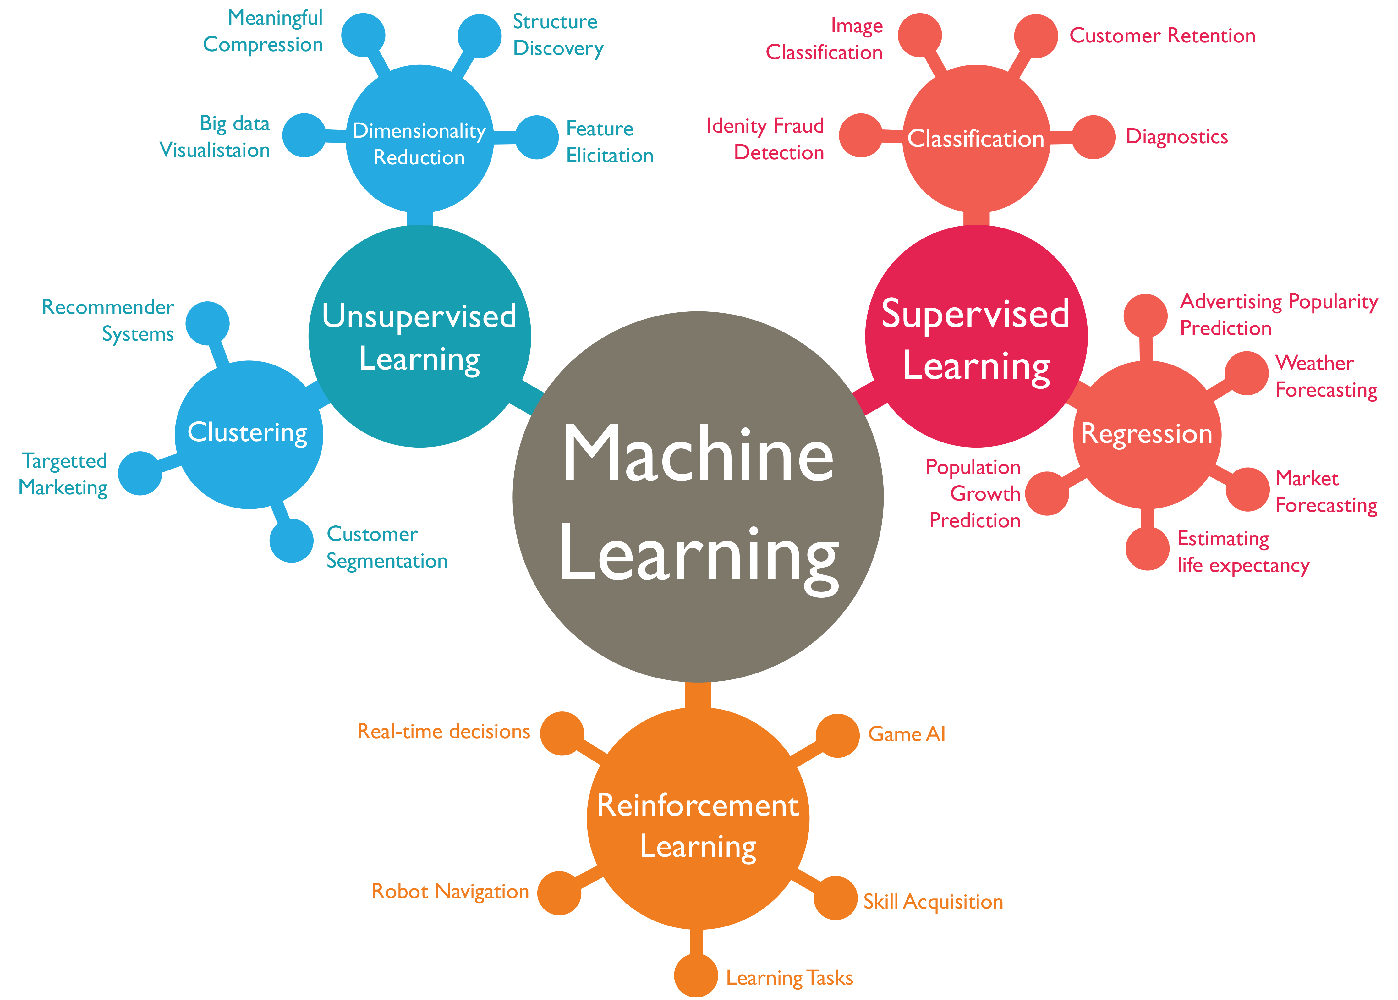
ref : www.wordstream.com

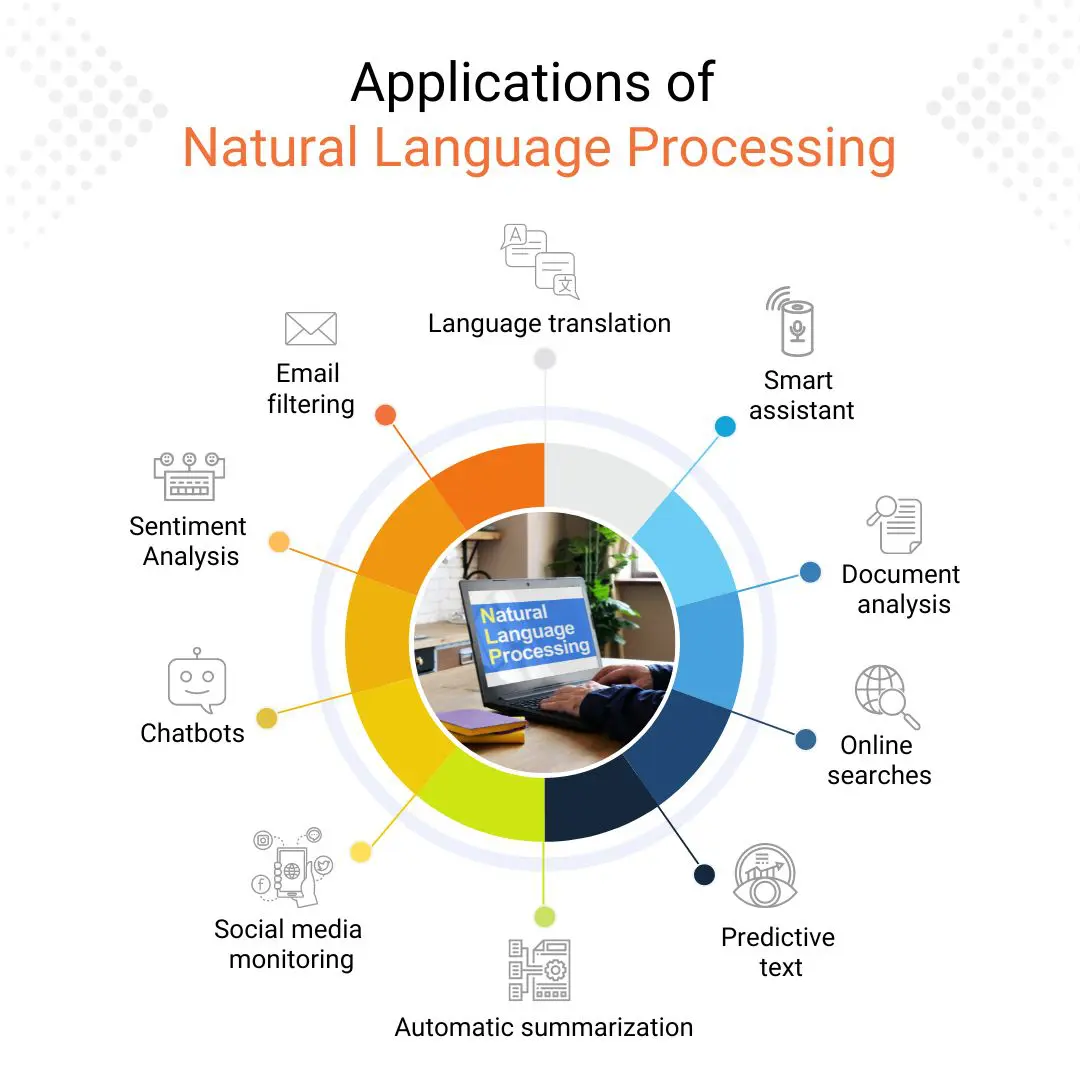
ref : https://datasciencedojo.com/blog/natural-language-processing-applications/